# Mineria de Textos
## Textos

**Autor:** Santiago Franco Morales  
**Fecha:** Octubre 2025  
**Dataset:**   
**Fuente:** 

---

### Limpieza de datos
Realizar una extracion y revision de los textos especificados

In [ ]:
import re
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import spacy
from spacy.matcher import Matcher
import string

In [9]:
nlp = spacy.load("es_core_news_sm")

### El cuervo

In [10]:
text_cuervo = """Edgar Allan Poe
El Cuervo

Cierta noche aciaga, cuando, con la mente cansada,
meditaba sobre varios libracos de sabiduría ancestral
y asentía, adormecido, de pronto se oyó un rasguido,
como si alguien muy suavemente llamara a mi portal.
"Es un visitante -me dige-, que está llamando al portal;
sólo eso y nada más."

¡Ah, recuerdo tan claramente aquel desolado diciembre!
Cada chispa resplandeciente dejaba un rastro espectral.
Yo esperaba ansioso el alba, pues no había hallado calma
en mis libros,ni consuelo a la perdida abismal
de aquella a quien los ángeles Leonor podrán llamar
y aquí nadie nombrará.

Cada crujido de las cortinas purpúreas y cetrinas
me embargaba de dañinas dudas y mi sobresalto era tal
que, para calmarr mi angustia repetí con voz mustia:
"No es sino un visitante que ha llegado a mi portal;
un tardío visitante esperando en mi portal.
Sólo eso y nada más".

Mas de pronto me animé y sin vacilación hablé:
"Caballero -dije-, o señora, me tendréis que disculpar
pues estaba adormecido cuando oí vuestro rasguido
y tan suave había sido vuestro golpe en mi portal
que dudé de haberlo oído...", y abrí de golpe el portal:
sólo sombras, nada más.

La noche miré de lleno, de temor y dudas pleno,
y soñé sueños que nadie osó soñar jamás;
pero en este silencio atroz, superior a toda voz,
sólo se oyó la palabra "Leonor", que yo me atreví a susurrar...
sí, susurré la palabra "Leonor" y un eco volvióla a nombrar.
Sólo eso y nada más.

Aunque mi alma ardía por dentro regresé a mis aposentos
pero pronto aquel rasguido se escuchó más pertinaz.
"Esta vez quien sea que llama ha llamado a mi ventana;
veré pues de qué se trata, que misterio habrá detrás.
Si mi corazón se aplaca lo podré desentrañar.
¡Es el viento y nada más!".

Mas cuando abrí la persiana se coló por la ventana,
agitando el plumaje, un cuervo muy solemne y ancestral.
Sin cumplido o miramiento, sin detenerse un momento,
con aire envarado y grave fue a posarse en mi portal,
en un pálido busto de Palas que hay encima del umbral;
fue, posóse y nada más.

Esta negra y torva ave tocó, con su aire grave,
en sonriente extrañeza mi gris solemnidad.
"Ese penacho rapado -le dije-, no te impide ser
osado, viejo cuervo desterrado de la negrura abisal;
¿cuál es tu tétrico nombre en el abismo infernal?"
Dijo el cuervo: "Nunca más".

Que una ave zarrapastrosa tuviera esa voz virtuosa
sorprendióme aunque el sentido fuera tan poco cabal,
pues acordaréis conmigo que pocos habrán tenido
ocasión de ver posado tal pájaro en su portal.
Ni ave ni bestia alguna en la estatua del portal
que se llamara "Nunca más".

Mas el cuervo, altivo, adusto, no pronunció desde el busto,
como si en ello le fuera el alma, ni una sílaba más.
No movió una sola pluma ni dijo palabra alguna
hasta que al fin musité: "Vi a otros amigos volar;
por la mañana él también, cual mis anhelos, volará".
Dijo entonces :"Nunca más".

Esta certera respuesta dejó mi alma traspuesta;
"Sin duda - dije-, repite lo que ha podido acopiar
del repertorio olvidado de algún amo desgraciado
que en su caída redujo sus canciones a un refrán:
"Nunca, nunca más".

Como el cuervo aún convertía en sonrisa mi porfía
planté una silla mullida frente al avi y el portal;
y hundido en el terciopelo me afané con recelo
en descubrir que quería la funesta ave ancestral
al repetir: "Nunca más".

Esto, sentado, pensaba, aunque sin decir palabra
al ave que ahora quemaba mi pecho con su mirar;
eso y más cosas pensaba, con la cabeza apoyada
sobre el cojín purpúreo que el candil hacía brillar.
¡ Sobre aquel cojín purpúreo que ella gustaba de usar,
y ya no usará nunca más!.

Luego el aire se hizo denso, como si ardiera un incienso
mecido por serafines de leve andar musical.
"¡Miserable! -me dije-. ¡Tu Diós estos ángeles dirige
hacia ti con el filtro que a Leonor te hará olvidar!
¡Bebe, bebe el dulce filtro, y a Leonor olvidarás!".
Dijo el cuervo: "Nunca más".

"¡Profeta! -grité-, ser malvado, profeta eres, diablo alado!
¿Del Tentador enviado o acaso una tempestad
trajo tu torvo plumaje hasta este yermo paraje,
a esta morada espectral? ¡Mas te imploro, dime ya,
dime, te imploro, si existe algun bálsamo en Galaad!"
Dijo el cuervo: "Nunca más".

"¡Profeta! -grité-, ser malvado, profeta eres, diablo alado!
Por el Diós que veneramos, por el manto celestial,
dile a este desventurado si en el Edén lejano
a Leonor , ahora entre ánngeles, un día podré abrazar".
Dijo el cuervo: "¡Nunca más!".

"¡Diablo alado, no hables más!", dije, dando un paso atrás;
¡Que la tromba te devuelva a la negrura abisal!
¡Ni rastro de tu plumaje en recuerdo de tu ultraje
quiero en mi portal! ¡Deja en paz mi soledad!
¡Quita el pico de mi pecho y tu sombra del portal!"
Dijo el cuervo: "Nunca más".

Y el impávido cuervo osado aun sigue, sigue posado,
en el pálido busto de Palas que hay encima del portal;
y su mirada aguileña es la de un demonio que sueña,
cuya sombra el candil en el suelo proyecta fantasmal;
y mi alma, de esa sombra que allí flota fantasmal,
no se alzará...¡nunca más!"""

# La mujer mas hermosa de la ciudad

In [11]:
text_chica = """La mujer más hermosa de la ciudad
[Cuento - Texto completo.]

Charles Bukowski
Cass era la más joven y hermosa de cinco hermanas. Cass era la mujer más hermosa de la ciudad. Medio india, con un cuerpo flexible y extraño, un cuerpo fiero y serpentino y ojos a juego. Cass era fuego móvil y fluido. Era como un espíritu embutido en una forma incapaz de contenerlo. Su pelo era negro y largo y sedoso y se movía y se retorcía igual que su cuerpo. Cass estaba siempre muy alegre o muy deprimida. Para ella no había término medio. Algunos decían que estaba loca. Lo decían los tontos. Los tontos no podían entender a Cass. A los hombres les parecía simplemente una máquina sexual y no se preocupaban de si estaba loca o no. Y Cass bailaba y coqueteaba y besaba a los hombres pero, salvo un caso o dos, cuando llegaba la hora de hacerlo, Cass se evadía de algún modo, los eludía.

Sus hermanas la acusaban de desperdiciar su belleza, de no utilizar lo bastante su inteligencia, pero Cass poseía inteligencia y espíritu; pintaba, bailaba, cantaba, hacía objetos de arcilla, y cuando la gente estaba herida, en el espíritu o en la carne, a Cass le daba una pena tremenda. Su mente era distinta y nada más; sencillamente, no era práctica. Sus hermanas la envidiaban porque atraía a sus hombres, y andaban rabiosísimas porque creían que no les sacaba todo el partido posible. Tenía la costumbre de ser buena y amable con los feos; los hombres considerados guapos le repugnaban: “No tienen agallas -decía ella-. No tienen nervio. Confían siempre en sus orejitas perfectas y en sus narices torneadas… todo fachada y nada dentro…” Tenía un carácter rayando la locura; un carácter que algunos calificaban de locura.

Su padre había muerto del alcohol y su madre se había largado dejando solas a las chicas. Las chicas se fueron con una pariente que las metió en un colegio de monjas. El colegio había sido un lugar triste, más para Cass que para sus hermanas. Las chicas envidaban a Cass y Cass se peleó con casi todas. Tenía señales de cuchilladas por todo el brazo izquierdo, de defenderse en dos peleas. Tenía también una cicatriz imborrable que le cruzaba la mejilla izquierda; pero la cicatriz, en vez de disminuir su belleza parecía, por el contrario, realzarla.

Yo la conocí en el bar West End unas noches después de que la soltaran del convento. Al ser la más joven, fue la última hermana que soltaron. Sencillamente entró y se sentó a mi lado. Yo quizá sea el hombre más feo de la ciudad, y puede que esto tuviera algo que ver con el asunto.

-¿Tomas algo?

-Claro, ¿por qué no?

No creo que hubiese nada especial en nuestra conversación esa noche, era solo el sentimiento que Cass transmitía. Me había elegido y no había más. Ninguna presión. Le gustó la bebida y bebió mucho. No parecía tener edad, pero de todos modos le sirvieron. Quizás hubiese falsificado el carné de identidad, no sé. En fin, lo cierto es que cada vez que volvía del baño y se sentaba a mi lado yo sentía cierto orgullo. No solo era la mujer más bella de la ciudad, sino también una de las más bellas que yo había visto en mi vida. Le eché el brazo a la cintura y la besé una vez.

-¿Crees que soy bonita? -preguntó.

-Sí, desde luego. Pero hay algo más… algo más que tu apariencia…

-La gente anda siempre acusándome de ser bonita. ¿Crees de veras que soy bonita?

-Bonita no es la palabra, no te hace justicia.

Buscó en su bolso. Creí que buscaba el pañuelo. Sacó un alfiler de sombrero muy largo. Antes de que pudiese impedírselo, se había atravesado la nariz con él, de lado a lado, justo sobre las ventanillas. Sentí repugnancia y horror.

Ella me miró y se echó a reír.

-¿Crees ahora que soy bonita? ¿Qué piensas ahora, eh?

Saqué el alfiler y puse mi pañuelo sobre la herida. Algunas personas, incluido el encargado, habían observado la escena. El encargado se acercó.

-Mira -dijo a Cass-, si vuelves a hacer eso te echo. Aquí no necesitamos tus exhibiciones.

-¡Vete a la mierda, amigo! -dijo ella.

-Será mejor que la controles -me dijo el encargado.

-No te preocupes -dije yo.

-Es mi nariz -dijo Cass-, puedo hacer lo que quiera con ella.

-No -dije-, a mí me duele.

-¿Quieres decir que te duele a ti cuando me clavo un alfiler en la nariz?

-Sí, me duele, de veras.

-De acuerdo, no lo volveré a hacer. ¡Ánimo!

Me besó, pero como riéndose un poco en medio del beso y sin soltar el pañuelo de la nariz. Cuando cerraron nos fuimos a donde yo vivía. Tenía un poco de cerveza y nos sentamos a charlar. Fue entonces cuando pude apreciar que era una persona que rebosaba bondad y cariño. Se entregaba sin saberlo. Al mismo tiempo, retrocedía a zonas de descontrol e incoherencia. Esquizoide. Una esquizo hermosa y espiritual. Quizás algún hombre o algo acabase destruyéndola para siempre. Esperaba no ser yo.

Nos fuimos a la cama y cuando apagué las luces me preguntó:

-¿Cuándo quieres hacerlo, ahora o por la mañana?

-Por la mañana -dije, y me di la vuelta.

Por la mañana me levanté, hice un par de cafés y le llevé uno a la cama. Se echó a reír.

-Eres el primer hombre que conozco que no ha querido hacerlo por la noche.

-No hay problema -dije-. En realidad no tenemos que hacerlo.

-No, espera, ahora quiero yo. Déjame que me refresque un poco.

Se fue al baño. Salió enseguida, realmente maravillosa, largo pelo negro resplandeciente, ojos y labios resplandecientes, toda resplandor… Se desperezó sosegadamente, buena cosa. Se metió en la cama.

-Ven, amor.

Fui. Besaba con abandono, pero sin prisa. Dejé que mis manos recorriesen su cuerpo. Acariciasen su pelo. La monté. Su carne era cálida y firme. Empecé a moverme despacio y queriendo que durara. Ella me miraba a los ojos.

-¿Cómo te llamas? -pregunté.

-¿Qué diablos importa? -preguntó ella.

Solté una carcajada y seguí. Después se vistió y la llevé en coche al bar, pero era difícil olvidarla. No tenía que trabajar así que dormí hasta las dos y luego me levanté y leí el periódico. Cuando estaba en la bañera, entró ella con una hoja: una oreja de elefante.

-Sabía que estarías en la bañera -dijo-, así que te traje algo para tapar esa cosa.

Y me echó encima, en la bañera, la hoja de elefante.

-¿Cómo sabías que estaba en la bañera?

-Lo sabía.

Cass llegaba casi todos los días cuando yo estaba en la bañera. No era siempre la misma hora, pero raras veces fallaba, y traía las hojas de elefante. Y luego hacíamos el amor. Telefoneó una o dos noches y tuve que sacarla de la cárcel por borrachera y pelea.

-Esos hijos de puta -decía-, solo porque te pagan unas copas creen que pueden llevarte a la cama.

-La culpa la tienes tú por aceptar la copa.

-Yo creía que se interesaba por mí, no solo por mi cuerpo.

-A mí me interesas tú y tu cuerpo. Pero dudo que la mayoría de los hombres puedan ver más allá de tu cuerpo.

Dejé la ciudad y estuve fuera seis meses, anduve vagabundeando; volví. No había olvidado a Cass ni un momento, pero habíamos tenido algún tipo de discusión y además yo tenía ganas de ponerme en marcha, y cuando volví pensé que se habría ido; pero no llevaba sentado treinta minutos en el West End cuando ella llegó y se sentó a mi lado.

-Vaya, cabrón, veo que has vuelto.

Pedí un trago para ella. Luego la miré. Llevaba un vestido de cuello alto. Nunca la había visto así. Y debajo de cada ojo, clavado, llevaba un alfiler de cabeza de cristal. Solo se podían ver las cabezas de los alfileres, pero los alfileres estaban clavados.

-Maldita sea, aún sigues intentando destruir tu belleza….

-No, no seas tonto, es la moda.

-Estás chiflada.

-Te he echado de menos -dijo.

-¿Hay otro?

-No, no hay ninguno. Solo tú. Pero ahora trabajo en la calle. Cobro diez billetes. Pero para ti es gratis.

-Sácate esos alfileres.

-No, es la moda.

-Me hace muy desgraciado.

-¿Estás seguro?

-Sí, mierda, estoy seguro.

Se sacó lentamente los alfileres y los guardo en el bolso.

-Porque la gente cree que es todo lo que tengo. La belleza no es nada. La belleza no permanece. No sabes la suerte que tienes siendo feo, porque si le agradas a alguien sabes que es por otra cosa.

-Vale -dije-, tengo mucha suerte.

-No quiero decir que seas feo. Solo que la gente cree que lo eres. Tienes una cara fascinante.

-Gracias.

Tomamos otra copa.

-¿Qué andas haciendo? -preguntó.

-Nada. No soy capaz de apegarme a nada. Nada me interesa.

-A mí tampoco. Si fueses mujer podrías ser puta.

-No creo que quisiera establecer un contacto tan íntimo con tantos extraños. Debe ser un fastidio.

-Tienes razón, es fastidioso, todo es fastidioso.

Salimos juntos a la calle. La gente aún miraba a Cass. Aún era una mujer hermosa, quizá más que nunca.

Fuimos a casa. Abrí una botella de vino y hablamos. A Cass y a mí siempre nos era fácil hablar. Ella hablaba un rato, yo escuchaba, y luego hablaba yo. Nuestra conversación fluía fácil sin tensión. Era como si descubriésemos secretos juntos. Cuando descubríamos uno bueno, Cass se reía con aquella risa… de aquella manera en que solo ella podía reírse. Y durante la charla nos besábamos y nos arrimábamos. Nos pusimos muy calientes y decidimos irnos a la cama. Fue entonces cuando Cass se quito aquel vestido del cuello alto y lo vi… Vi la mellada y horrible cicatriz que le cruzaba el cuello. Era grande y ancha.

-Maldita sea, condenada, ¿Qué has hecho? -dije desde la cama.

-Lo intenté con una botella rota una noche. ¿Ya no te gusto? ¿Soy bonita aún?

La arrastré a la cama y la besé. Me empujó y se echo a reír:

-Algunos me pagan los diez y luego, cuando me desvisto, no quieren hacerlo. Yo me quedo los diez. Es muy divertido.

-Sí -dije-, no puedo parar de reír… Cass, cabrona, te amo… deja de destruirte; eres la mujer con más vida que conozco.

Volvimos a besarnos. Cass lloraba en silencio. Sentí las lágrimas. Sentí aquel pelo largo y negro tendido bajo mí como una bandera de muerte. Disfrutamos e hicimos un amor lento y sombrío y maravilloso.

Por la mañana, Cass estaba levantada haciendo el desayuno. Parecía muy tranquila y feliz. Cantaba. Yo me quedé en la cama gozando su felicidad. Por fin, vino y me zarandeó.

-¡Arriba, cabrón! ¡Échate agua fría en la cara y la pinga y ven a disfrutar del banquete!

Ese día la llevé en coche a la playa. No era un día de fiesta y aún no era verano, todo estaba espléndidamente desierto. Vagabundos playeros en andrajos dormían en la arena. Había otros sentados en bancos de piedra compartiendo una botella solitaria. Las gaviotas revoloteaban, estúpidas pero distraídas. Ancianas de setenta y ochenta, sentadas en los bancos, discutían las ventas de fincas dejadas por maridos asesinados mucho tiempo atrás por la angustia y la estupidez de la supervivencia. Había paz en el aire y paseamos y estuvimos tumbados por allí y no hablamos mucho. Era agradable simplemente estar juntos. Compré sándwiches, papas fritas y bebidas y nos sentamos a beber en la arena. Luego abracé a Cass y dormimos así abrazados un rato. Era mejor que hacer el amor. Era como fluir juntos sin tensión. Luego volvimos a casa en mi coche y preparé la cena. Después de cenar, le sugerí a Cass que viviésemos juntos. Se quedó mucho rato mirándome y luego dijo lentamente: “no”. La llevé de nuevo al bar, le pagué una copa y me fui.

Al día siguiente, encontré trabajo como empaquetador en una fábrica y trabajé todo lo que quedaba de semana. Estaba demasiado cansado para andar mucho por ahí, pero el viernes por la noche me acerqué al West End. Me senté y esperé a Cass. Pasaron horas. Cuando estaba ya bastante borracho, me dijo el encargado.

-Siento lo de tu amiga.

-¿El qué? -pregunté.

-Lo siento. ¿No lo sabías?

-No

-Suicidio, la enterraron ayer.

-¿Enterrada? -pregunté. Parecía como si fuese a aparecer en la puerta de un momento a otro. ¿Cómo podía haber muerto?

-La enterraron las hermanas.

-¿Un suicidio? ¿Cómo fue?

-Se cortó el cuello.

-Ya. Dame otro trago.

Estuve bebiendo allí hasta que cerraron. Cass, la más bella de las cinco hermanas, la mujer más hermosa de la ciudad. Conseguí conducir hasta casa sin poder dejar de pensar que debería haber insistido en que se quedara conmigo en vez de aceptar aquel “no”. Todo en ella había indicado que le pasaba algo. Yo sencillamente había sido demasiado insensible, demasiado despreocupado. Me merecía mi muerte y la de ella. Era un perro. No, ¿por qué acusar a los perros? Me levanté, busqué una botella de vino, bebí lúgubremente. Cass, la chica más guapa de la ciudad, muerta a los veinte años.

Fuera, alguien tocaba la bocina de un coche. Unos bocinazos escandalosos, persistentes. Dejé la botella y aullé:

-¡MALDITO SEAS, CONDENADO HIJO DE PUTA, CÁLLATE YA!

Seguía avanzando la noche y yo no podía hacer nada.

FIN"""

Normalisar textos 

In [14]:
def normalize_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove emojis (simple regex for common emojis)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

norm_cuervo = normalize_text(text_cuervo)
norm_chica = normalize_text(text_chica)

print("Normalized El Cuervo:", norm_cuervo[:200])  # Preview
print("Normalized La Chica:", norm_chica[:200])  # Preview

Normalized El Cuervo: edgar allan poe el cuervo cierta noche aciaga cuando con la mente cansada meditaba sobre varios libracos de sabiduría ancestral y asentía adormecido de pronto se oyó un rasguido como si alguien muy su
Normalized La Chica: la mujer más hermosa de la ciudad cuento texto completo charles bukowski cass era la más joven y hermosa de cinco hermanas cass era la mujer más hermosa de la ciudad medio india con un cuerpo flexible


### SpaCy

In [15]:
def count_paragraphs(text):
    return len([p for p in text.split('\n\n') if p.strip()])

def count_sentences(text):
    return len(re.findall(r'[.!?]', text)) + 1  # Approximate

def count_words(text):
    return len(text.split())

# For original texts, not normalized, to keep structure
paras_cuervo = count_paragraphs(text_cuervo)
sent_cuervo = count_sentences(text_cuervo)
words_cuervo = count_words(text_cuervo)

paras_chica = count_paragraphs(text_chica)
sent_chica = count_sentences(text_chica)
words_chica = count_words(text_chica)

print(f"El Cuervo: {paras_cuervo} paragraphs, {sent_cuervo} sentences, {words_cuervo} words")
print(f"La Chica: {paras_chica} paragraphs, {sent_chica} sentences, {words_chica} words")

El Cuervo: 19 paragraphs, 64 sentences, 881 words
La Chica: 100 paragraphs, 255 sentences, 2236 words


### Reflexion
El Cuervo es un poema con estructura rítmica, más corto en palabras pero complejo en lenguaje poético. La Chica es un cuento narrativo más largo, con diálogos y descripciones detalladas, indicando mayor longitud y complejidad narrativa."

## Tokenizacion

In [16]:
def process_text_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]
    return tokens

tokens_cuervo = process_text_spacy(norm_cuervo)
tokens_chica = process_text_spacy(norm_chica)

freq_cuervo = Counter(tokens_cuervo).most_common(10)
freq_chica = Counter(tokens_chica).most_common(10)

print("Most frequent in El Cuervo:", freq_cuervo)
print("Most frequent in La Chica:", freq_chica)

Most frequent in El Cuervo: [('portal', 13), ('cuervo', 11), ('llamar', 6), ('leonor', 6), ('decir', 5), ('ave', 5), ('sombra', 4), ('palabra', 4), ('alma', 4), ('profeta', 4)]
Most frequent in La Chica: [('cass', 29), ('decir', 11), ('poder', 8), ('hombre', 8), ('alfiler', 8), ('querer', 8), ('cama', 8), ('mujer', 7), ('ciudad', 7), ('hermana', 7)]


### Visualizacion

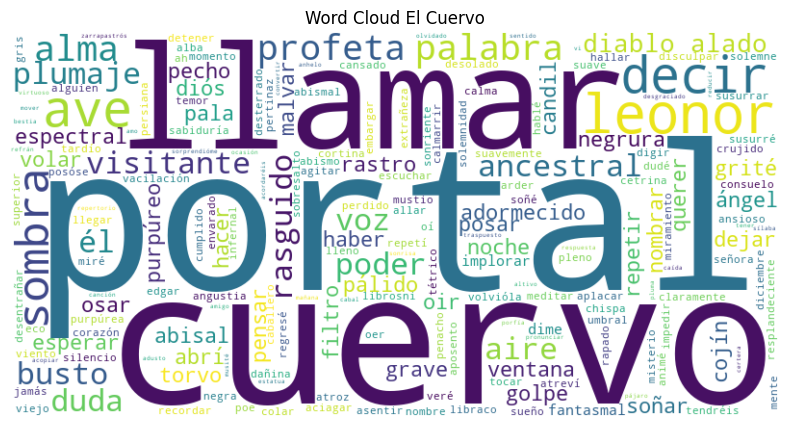

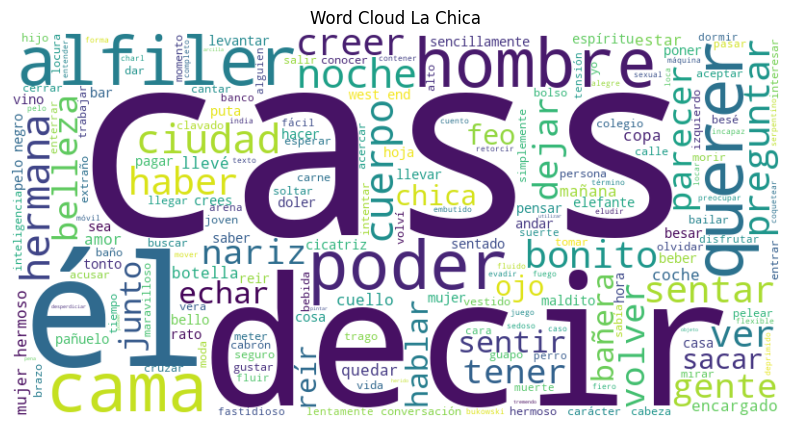

In [19]:
def generate_wordcloud(tokens, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(tokens_cuervo, "Word Cloud El Cuervo")
generate_wordcloud(tokens_chica, "Word Cloud La Chica")

En El Cuervo, términos como 'cuervo', 'nunca', 'más' indican temas de pérdida, eternidad y melancolía. En La Chica, 'cass', 'mujer', 'bonita' sugieren temas de belleza, autodestrucción y relaciones.

## Post tagging

Nouns El Cuervo: [('cuervo', 5), ('sombra', 4), ('palabra', 4), ('portal', 3), ('voz', 3), ('alma', 3), ('aire', 3), ('ave', 3), ('oir', 2), ('duda', 2)]
Verbs El Cuervo: [('llamar', 6), ('decir', 5), ('dejar', 2), ('esperar', 2), ('nombrar', 2), ('osar', 2), ('posar', 2), ('pala', 2), ('volar', 2), ('repetir', 2)]
Adjs El Cuervo: [('portal', 10), ('ancestral', 3), ('rasguido', 3), ('visitante', 3), ('alado', 3), ('adormecido', 2), ('espectral', 2), ('grave', 2), ('pálido', 2), ('busto', 2)]
Nouns La Chica: [('cass', 13), ('hombre', 8), ('mujer', 7), ('ciudad', 6), ('hermana', 6), ('cuerpo', 6), ('noche', 6), ('belleza', 5), ('gente', 5), ('cama', 5)]
Verbs La Chica: [('decir', 11), ('creer', 6), ('ver', 6), ('preguntar', 6), ('dejar', 5), ('sentar', 5), ('volver', 5), ('sentir', 5), ('echar', 5), ('hablar', 5)]
Adjs La Chica: [('hermoso', 6), ('bonito', 6), ('junto', 5), ('feo', 4), ('encargado', 4), ('bañera', 4), ('negro', 3), ('chica', 3), ('bello', 3), ('maldito', 3)]


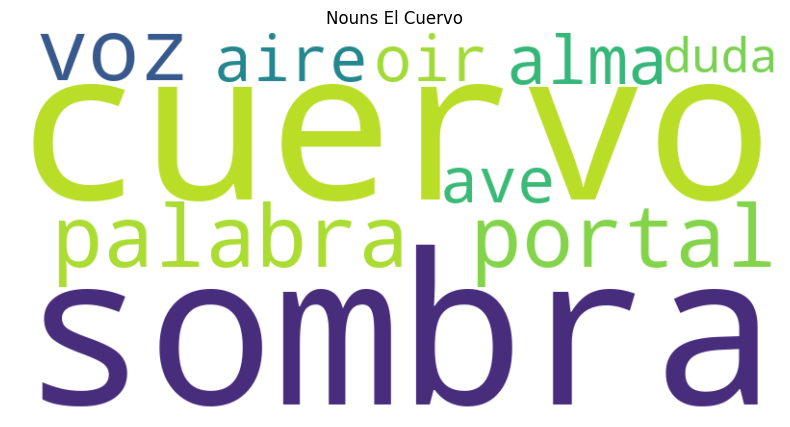

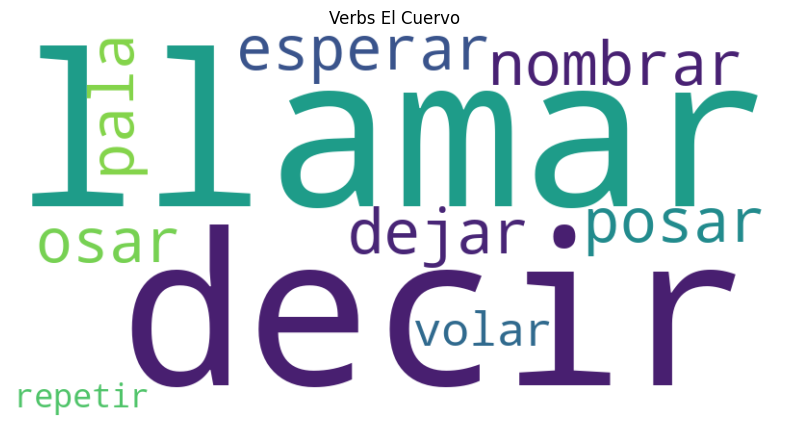

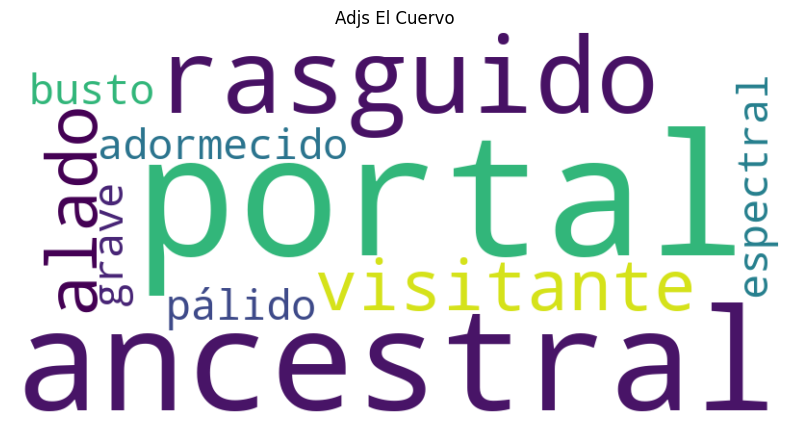

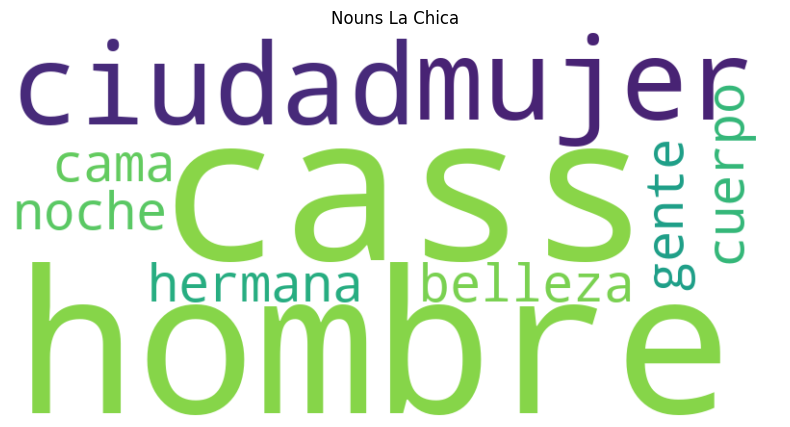

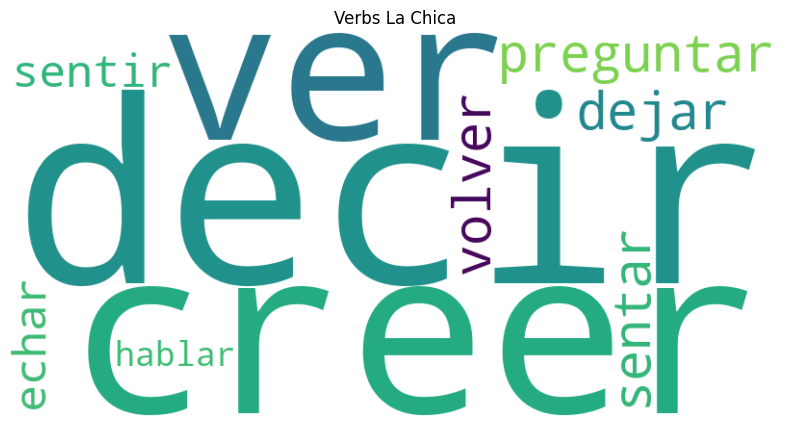

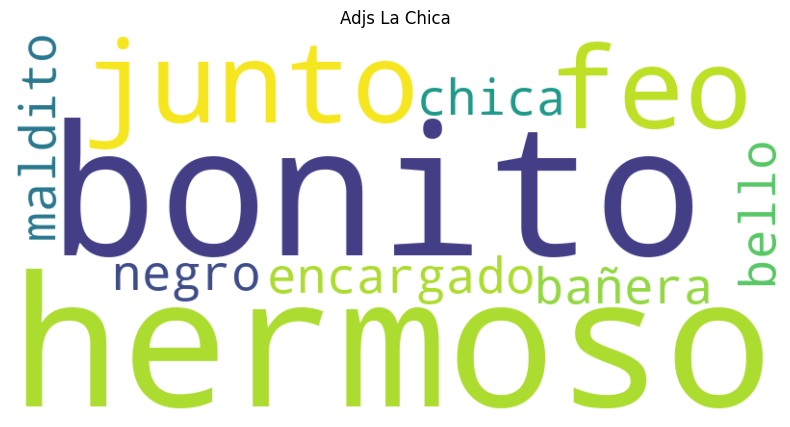

In [21]:
def get_pos_freq(tokens, pos_tag):
    doc = nlp(' '.join(tokens))  # Reprocess
    pos_words = [token.text for token in doc if token.pos_ == pos_tag]
    return Counter(pos_words).most_common(10)

# Nouns (NOUN), Verbs (VERB), Adjectives (ADJ)
nouns_cuervo = get_pos_freq(tokens_cuervo, 'NOUN')
verbs_cuervo = get_pos_freq(tokens_cuervo, 'VERB')
adjs_cuervo = get_pos_freq(tokens_cuervo, 'ADJ')

nouns_chica = get_pos_freq(tokens_chica, 'NOUN')
verbs_chica = get_pos_freq(tokens_chica, 'VERB')
adjs_chica = get_pos_freq(tokens_chica, 'ADJ')

print("Nouns El Cuervo:", nouns_cuervo)
print("Verbs El Cuervo:", verbs_cuervo)
print("Adjs El Cuervo:", adjs_cuervo)

print("Nouns La Chica:", nouns_chica)
print("Verbs La Chica:", verbs_chica)
print("Adjs La Chica:", adjs_chica)

# Word clouds per category
generate_wordcloud([w[0] for w in nouns_cuervo], "Nouns El Cuervo")
generate_wordcloud([w[0] for w in verbs_cuervo], "Verbs El Cuervo")
generate_wordcloud([w[0] for w in adjs_cuervo], "Adjs El Cuervo")

generate_wordcloud([w[0] for w in nouns_chica], "Nouns La Chica")
generate_wordcloud([w[0] for w in verbs_chica], "Verbs La Chica")
generate_wordcloud([w[0] for w in adjs_chica], "Adjs La Chica")

En El Cuervo, sustantivos como 'portal', 'cuervo' dominan cosas misteriosas; verbos como 'decir', 'ser' indican narración introspectiva; adjetivos como 'más', 'nunca' enfatizan negatividad. En La Chica, sustantivos como 'cass', 'mujer' enfocan personajes; verbos como 'decir', 'hacer' muestran acciones diarias; adjetivos como 'bonita', 'hermosa' destacan descripciones de belleza y destrucción.

### SVO

In [31]:
doc_cuervo = nlp(text_cuervo.lower())
doc_chica = nlp(text_chica.lower())

svos_cuervo = extract_svo(doc_cuervo)
svos_chica = extract_svo(doc_chica)

In [33]:
print ('svos_cuervo', svos_cuervo[:5] )
print ('svos_chica', svos_chica[:5])

svos_cuervo [('alguien', 'llamara', 'portal'), ('chispa', 'dejaba', 'rastro'), ('yo', 'esperaba', 'alba'), ('llamar', 'hallado', 'calma'), ('ángeles', 'leonor', 'quien')]
svos_chica [('tontos', 'decían', 'lo'), ('cass', 'bailaba', 'eludía'), ('cass', 'evadía', 'modo'), ('hermanas', 'acusaban', 'la'), ('cass', 'poseía', 'inteligencia')]


En El Cuervo, las tripletas SVO como ('alguien', 'llamara', 'portal') y ('yo', 'esperaba', 'alba') destacan acciones introspectivas y elementos misteriosos (llamadas, esperas), revelando ideas comunes de aislamiento, anticipación y pérdida eterna asociada a Leonor. Se infiere una tendencia melancólica y argumentativa sobre la inevitabilidad del dolor, con opiniones implícitas de fatalismo a través de interacciones simbólicas (e.g., ángeles y nombres).
En La Chica, tripletas como ('cass', 'bailaba', 'eludía'), ('cass', 'evadía', 'modo') y ('cass', 'poseía', 'inteligencia') enfatizan acciones de la protagonista relacionadas con evasión, posesión y acusaciones, mostrando afirmaciones comunes sobre belleza autodestructiva y relaciones superficiales. Se infiere una opinión crítica sobre la sociedad (tontos juzgando, hermanas acusando), con tendencias a la autodestrucción y argumento sobre la belleza como carga efímera, destacando crítica social y emocional.